In [6]:
# 使用request从http://archive.ics.uci.edu/ml/datasets/Wine+Quality下载葡萄酒数据
import requests
import os
import pandas as pd
from typing import Any

def download_data(url, filename):
    if not os.path.exists(filename):
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)


url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
filename = 'winequality-white.csv'
download_data(url, filename)
wine = pd.read_csv(filename, sep=';')
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [3]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [4]:
def softmax(X_mat,w):

    y_hat = X_mat *w
    # 将y_hat每一行减去该行最大值
    y_hat = y_hat - np.max(y_hat,axis=1)
    y_hat = np.exp(y_hat)
    # print("y_hat_init",y_hat[4745,:])
    y_hat = y_hat / np.sum(y_hat,axis=1)
    # print("y_hat_init",y_hat[4745,:])
    return y_hat


learning_rate = 0.01
X=wine.iloc[:,:-1]
y=wine.iloc[:,-1]
X_mat=np.mat(X)
y_mat=np.mat(y).T

class_num = len(np.unique(y))
feature_num = X.shape[1]
sample_num = X.shape[0]
w = np.random.rand(feature_num,class_num)


In [208]:
temp=0
one_hot_dict={}
for i in np.unique(y):
    one_hot_dict[i]=temp
    temp+=1

one_hot_dict={3:0,4:1,5:2,6:3,7:4,8:5,9:6}
y_onehot = np.zeros((sample_num,class_num))
for i in range(sample_num):
    y_onehot[i,one_hot_dict[y[i]]]=1


for i in range(50000):
    y_hat = softmax(X_mat , w)

    # 计算梯度
    grad = -1 / sample_num  * X_mat.T @ (y_onehot - y_hat) 
 
    if np.linalg.norm(grad) < 1e-4:
        break
    # 更新权重
    w -= learning_rate * grad   
    print("w",w[0])
print("w",w)


w [ 0.84653429  0.40540329  0.36111912  0.04404571  0.48948846  0.90568525
 -0.02074905]
w [ 0.84684031  0.40777576  0.3817418   0.0061904   0.5015884   0.90806371
 -0.02067331]
w [ 0.84715058  0.41014835  0.33382037  0.03687476  0.51368834  0.91044223
 -0.02059756]
w [ 0.84743017  0.4125186   0.35444671  0.00660772  0.51822648  0.91281921
 -0.02052182]
w [ 0.84769902  0.41488549  0.37506025  0.03729206  0.46184073  0.91519559
 -0.02044607]
w [ 0.84800905  0.41725802  0.33095721  0.06415839  0.47394067  0.91757407
 -0.02037033]
w [ 0.84831937  0.41963061  0.35158358  0.02629489  0.48604061  0.91995259
 -0.02029458]
w [ 0.82958623  0.3756097   0.37219539  0.05449748  0.49814055  0.92171655
 -0.02021884]
w [ 0.82989656  0.37798231  0.39257987  0.01687607  0.51024049  0.92409486
 -0.02014309]
w [ 0.83020689  0.38035491  0.34465837  0.04756043  0.52234043  0.92647338
 -0.02006735]
w [ 0.83051722  0.38272751  0.36528439  0.00973554  0.53443779  0.92881623
 -0.0199916 ]
w [ 0.83082755  0.385

In [230]:
class Softmax_regression:
    # 初始化
    def __init__(self, max_iter=10000, learning_rate=0.0001,lambda_=0):
        '''
        ArithmeticError
        :param max_iter: 最大迭代次数
        :param learning_rate: 学习率(默认为0.00001，太大会造成不收敛 (๑ó﹏ò๑))
        :param lambda_: 正则化系数(默认为0,即不进行正则化)
        '''
        self._w = None
        self._one_hot_dict={}
        self._max_iter = max_iter
        self._learning_rate = learning_rate
        self._lambda_ = lambda_
        self._iter_count=0
        self._loss=[]
    
    # 训练
    def fit(self, X, y):
        X_mat=np.mat(X)
        y_mat=np.mat(y).T
        # 将X，y标准化
        

        class_num = len(np.unique(y))
        feature_num = X.shape[1]
        sample_num = X.shape[0]

        # 初始化权重
        self._w = np.random.rand(feature_num,class_num)
        
        #one_hot_dict将标签与one_hot编码对应
        temp=0
        for i in np.unique(y):
            self._one_hot_dict[i]=temp
            temp+=1

        #得到y的one_hot编码
        y_onehot = self.one_hot(y,sample_num,class_num)
        
        # 梯度下降
        for i in range(self._max_iter):
            self._iter_count+=1
            y_hat = self.softmax(X_mat)
            # 计算梯度
            grad = -1.0 * X_mat.T * (y_onehot - y_hat) / sample_num + self._lambda_ * self._w
            # 判断是否收敛
            if np.linalg.norm(grad) < 1e-4:
                break
            
            # 更新权重
            self._w -= self._learning_rate * grad   
            # 计算损失
            if i % 100 == 0:
                loss = self.loss(X,y)
                self._loss.append(loss)
        
    # one_hot编码
    def one_hot(self,y,sample_num,class_num):
        y_onehot = np.zeros((sample_num,class_num))
        for i in range(sample_num):
            y_onehot[i,self._one_hot_dict[y[i]]]=1
        return y_onehot
        
    # 计算softmax
    # 重点哈，不写的减去最大值，会出现nan，debug搞了3个小时(ಥ_ಥ)
    def softmax(self,X_mat):
        y_hat = X_mat * self._w
        # 将y_hat每一行减去该行最大值
        y_hat = y_hat - np.max(y_hat,axis=1)
        y_hat = np.exp(y_hat)
        y_hat = y_hat / np.sum(y_hat,axis=1)
        return y_hat
    
    # 损失函数
    def loss(self,X,y):
        X_mat=np.mat(X)
        y_mat=np.mat(y).T
        sample_num = X.shape[0]
        y_hat = self.softmax(X_mat)

        y_onehot = self.one_hot(y,sample_num,class_num)
        loss = -1.0 * np.sum(np.multiply(y_onehot,np.log(y_hat))) / sample_num 
        return loss
    
    # 
    def get_w(self):
        return self._w
    
    def get_iter_count(self):
        return self._iter_count
    

In [236]:
model = Softmax_regression(max_iter=10000,learning_rate=0.00001)
model.fit(X,y)

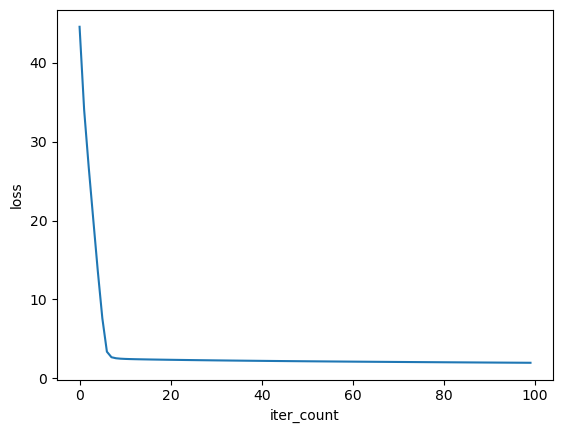

In [239]:
# 绘制损失函数
plt.plot(model._loss)
plt.xlabel('iter_count')
plt.ylabel('loss')
plt.show()

In [91]:
model.loss(X,y)

nan

In [249]:
classes=np.unique(y)
# 计算信息熵
entropy=0
for i in classes:
    entropy+=np.sum(y==i)/len(y)*np.log2(np.sum(y==i)/len(y))
entropy

-1.8617149332355558

In [259]:
X['citric acid'].unique()

array([0.36, 0.34, 0.4 , 0.32, 0.16, 0.43, 0.41, 0.37, 0.62, 0.38, 0.04,
       0.48, 0.42, 0.14, 0.35, 0.39, 0.2 , 0.23, 0.26, 0.27, 0.31, 0.25,
       0.29, 0.33, 0.59, 0.15, 0.24, 0.07, 0.03, 0.13, 0.28, 0.46, 0.3 ,
       0.61, 0.63, 0.66, 0.54, 0.5 , 0.  , 0.47, 0.56, 0.22, 0.67, 0.18,
       0.45, 0.44, 0.88, 0.21, 0.08, 0.49, 0.58, 0.7 , 0.6 , 0.51, 0.1 ,
       0.19, 0.12, 0.09, 0.53, 0.02, 0.65, 0.17, 0.71, 0.06, 0.68, 0.72,
       0.69, 1.66, 0.57, 0.05, 0.52, 1.  , 0.01, 0.74, 0.81, 0.55, 0.64,
       0.73, 0.99, 0.78, 0.79, 0.82, 0.8 , 1.23, 0.86, 0.11, 0.91])

In [266]:
len(y[X["citric acid"]<=0.2])

413

In [271]:
c=X.columns.drop("citric acid")

In [278]:
#遍历X的每一行，保
X.iloc[0,:]['pH']

3.0

In [274]:
X[c][X["citric acid"]<=0.2]

fixed acidity  volatile acidity  residual sugar  chlorides  \
6               6.2              0.32            7.00      0.045   
16              6.3              0.48            1.10      0.046   
19              6.5              0.31            7.50      0.044   
23              7.6              0.67            1.50      0.074   
34              5.8              0.27           14.95      0.044   
...             ...               ...             ...        ...   
4877            5.9              0.54            0.80      0.032   
4878            6.2              0.53            0.90      0.035   
4882            5.5              0.32            1.30      0.037   
4883            4.9              0.47            1.90      0.035   
4895            6.5              0.24            1.20      0.041   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6                    30.0                 136.0  0.99490  3.18       0.47   
16                   30.0                  99.0  0.99280  3.24       0.36   
19                   34.0                 133.0  0.99550  3.22       0.50   
23                   25.0                 168.0  0.99370  3.05       0.51   
34                   22.0                 179.0  0.99620  3.37       0.37   
...                   ...                   ...      ...   ...        ...   
4877                 12.0                  82.0  0.99286  3.25       0.36   
4878                  6.0                  81.0  0.99234  3.24       0.35   
4882                 45.0                 156.0  0.99184  3.26       0.38   
4883                 60.0                 148.0  0.98964  3.27       0.35   
4895                 30.0                 111.0  0.99254  2.99       0.46   

      alcohol  
6         9.6  
16        9.6  
19        9.5  
23        9.3  
34       10.2  
...       ...  
4877      8.8  
4878      9.5  
4882     10.7  
4883     11.5  
4895      9.4  

[413 rows x 10 columns]

In [325]:
# 定义树节点值
class tree_node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,value=None):
        self.feature=feature
        self.threshold=threshold
        self.left=left
        self.right=right
        self.value=value
    
    #判断是否为叶子节点
    def is_leaf(self):
        return self.value is not None

    # Obeject类重载
    def __repr__(self):
        if self.is_leaf():
            return 'Leaf:{:.3f}'.format(self.value)
        else:
            return 'Node:{:.3f}'.format(self.threshold)
    
    # Obeject类重载__getitem__方法
    def __getitem__(self,key):
        return self.__dict__[key]

# 定义C4.5决策树
class DecisionTree_C45:
    # 初始化
    '''ArithmeticError
    :param max_depth: 最大深度(默认为2)
    :param min_samples_split: 最小切分样本数(默认为2)
    :param min_impurity: 最小信息增益(默认为1e-7)
    '''
    def __init__(self,max_depth=2,min_samples_split=2,min_impurity=1e-7):
        self._root=None
        self._max_depth=max_depth
        self._min_samples_split=min_samples_split
        self._min_impurity=min_impurity
    
    # 计算信息熵
    def _entropy(self,y):
        # 统计y中每个类别的个数
        classes=np.unique(y)
        # 计算信息熵
        entropy=0
        for i in classes:
            entropy+=np.sum(y==i)/len(y)*np.log2(np.sum(y==i)/len(y))
        return -entropy
    
    # 计算信息增益
    def _info_gain(self,y,y1,y2):
        # 计算y的信息熵
        entropy=self._entropy(y)
        # 计算y1的信息熵
        entropy1=self._entropy(y1)
        # 计算y2的信息熵
        entropy2=self._entropy(y2)
        # 计算信息增益
        info_gain=entropy-(len(y1)/len(y)*entropy1+len(y2)/len(y)*entropy2)
        return info_gain
    
    # 计算最优切分点
    def _get_split_point(self,X : pd.DataFrame,y : pd.Series):
        # 初始化最优切分点
        best_info_gain=-1
        best_feature=None
        best_threshold=None
        # 遍历每个特征
        for feature in X.columns:
            # 获取该特征的所有取值
            feature_values=X[feature].unique()
            # 遍历该特征的每个取值
            for threshold in feature_values:
                # 根据该特征的该取值切分数据集
                y1=y[X[feature]<=threshold]
                y2=y[X[feature]>threshold]
                # 如果切分后的数据集小于最小切分样本数，则跳过该次循环
                if len(y1)<self._min_samples_split or len(y2)<self._min_samples_split:
                    continue
                # 计算信息增益
                info_gain=self._info_gain(y,y1,y2)
                # 如果信息增益大于最优信息增益，则更新最优信息增益、最优特征、最优切分点
                if info_gain>best_info_gain:
                    best_info_gain=info_gain
                    best_feature=feature
                    best_threshold=threshold
        return best_feature,best_threshold
    
    # 递归构建决策树
    def _build_tree(self,X:pd.DataFrame,y:pd.DataFrame,depth=0):
        # 如果当前节点的深度大于最大深度，则将当前节点的y值的众数设为叶子节点的值
        if depth>self._max_depth:
            return tree_node(value=y.value_counts().index[0])

        # 如果当前节点的样本数小于最小切分样本数，则将当前节点的y值的众数设为叶子节点的值
        if len(y)<self._min_samples_split or len(np.unique(y))==1 :
            return tree_node(value=y.value_counts().index[0])
        
        # 如果当前X只有一个特征，则将当前节点的y值的众数设为叶子节点的值
        if X.columns.size==1:
            return tree_node(value=y.value_counts().index[0])
        
        # 计算最优切分点
        feature,threshold=self._get_split_point(X,y)
        # 如果最优切分点的信息增益小于最小信息增益，则将当前节点的y值的众数设为叶子节点的值
        if feature is None or threshold < self._min_impurity:
            return tree_node(value=y.value_counts().index[0])
        
        new_col = X.columns.drop(feature)
        X_left  = X[new_col][X[feature]<=threshold]
        X_right = X[new_col][X[feature]>threshold]

        print("第{:d}层feature:".format(depth),feature)
        print("第{:d}层threshold:".format(depth),threshold)

        # 递归构建左子树
        left=self._build_tree(X_left,y[X[feature]<=threshold],depth+1)
        # 递归构建右子树
        right=self._build_tree(X_right,y[X[feature]>threshold],depth+1)
        # 返回当前节点
        return tree_node(feature,threshold,left,right)
    
    # 训练
    def fit(self,X:pd.DataFrame,y:pd.DataFrame):
        self._root=self._build_tree(X,y)

    # 预测
    def predict(self,X):
        # 预测结果列表
        y_pred=[]
        # 遍历每个样本
        for i in range(len(X)):
            # 从根节点开始
            sample=X.iloc[i,:]
            node=self._root
            # 如果当前节点不是叶子节点，则遍历子树
            while not node.is_leaf():
                # 如果样本的特征值小于当前节点的切分点，则遍历左子树
                if sample[node['feature']]<=node['threshold']:
                    node=node['left']
                # 如果样本的特征值大于当前节点的切分点，则遍历右子树
                else:
                    node=node['right']
            # 将当前节点的值作为预测结果
            y_pred.append(node['value'])
        return np.array(y_pred)
    
    # 计算准确率
    def accuracy(self,y,y_pred):
        return np.sum(y==y_pred)/len(y)
    
    # 可视化决策树
    def plot_tree(self):
        # 定义画布
        plt.figure(figsize=(2.5*2**self._max_depth,self._max_depth*2.5))
        # 定义子图
        ax=plt.subplot(111)
        # 隐藏坐标轴
        plt.axis('off')
        # 递归绘制决策树
        self._plot_tree(ax,self._root)
        # 显示图像
        plt.show()

    # 递归绘制决策树
    def _plot_tree(self,ax,node,x=0,y=0,level=3.5):
        # 如果当前节点是叶子节点，则绘制叶子节点
        if node.is_leaf():
            ax.text(x,y,node['value'],ha='center',va='center',fontsize=8,bbox=dict(facecolor='yellow',edgecolor='black',boxstyle='circle'))
        # 如果当前节点不是叶子节点，则绘制切分点
        else:
            ax.text(x,y,node['feature']+'\n'+str(node['threshold']),ha='center',va='center',fontsize=8,bbox=dict(facecolor='white',edgecolor='black',boxstyle='circle'))
            
            # 绘制连线
            ax.plot([x,x-level],[y,y-1],c='black')
            ax.plot([x,x+level],[y,y-1],c='black')

            # 绘制左子树
            self._plot_tree(ax,node['left'],x-level,y-1,level/2)
            # 绘制右子树
            self._plot_tree(ax,node['right'],x+level,y-1,level/2)

    

第0层feature: alcohol
第0层threshold: 10.8
第1层feature: volatile acidity
第1层threshold: 0.25
第2层feature: fixed acidity
第2层threshold: 6.6
第3层feature: sulphates
第3层threshold: 0.52
第4层feature: pH
第4层threshold: 3.35
第5层feature: total sulfur dioxide
第5层threshold: 129.0
第5层feature: chlorides
第5层threshold: 0.046
第4层feature: chlorides
第4层threshold: 0.041
第5层feature: citric acid
第5层threshold: 0.26
第5层feature: total sulfur dioxide
第5层threshold: 126.0
第3层feature: free sulfur dioxide
第3层threshold: 16.0
第4层feature: residual sugar
第4层threshold: 4.0
第5层feature: total sulfur dioxide
第5层threshold: 102.0
第5层feature: chlorides
第5层threshold: 0.039
第4层feature: density
第4层threshold: 0.998
第5层feature: total sulfur dioxide
第5层threshold: 150.0
第5层feature: citric acid
第5层threshold: 0.3
第2层feature: free sulfur dioxide
第2层threshold: 17.0
第3层feature: pH
第3层threshold: 3.28
第4层feature: sulphates
第4层threshold: 0.55
第5层feature: density
第5层threshold: 0.9924
第5层feature: citric acid
第5层threshold: 0.39
第4层feature: total sulfur 

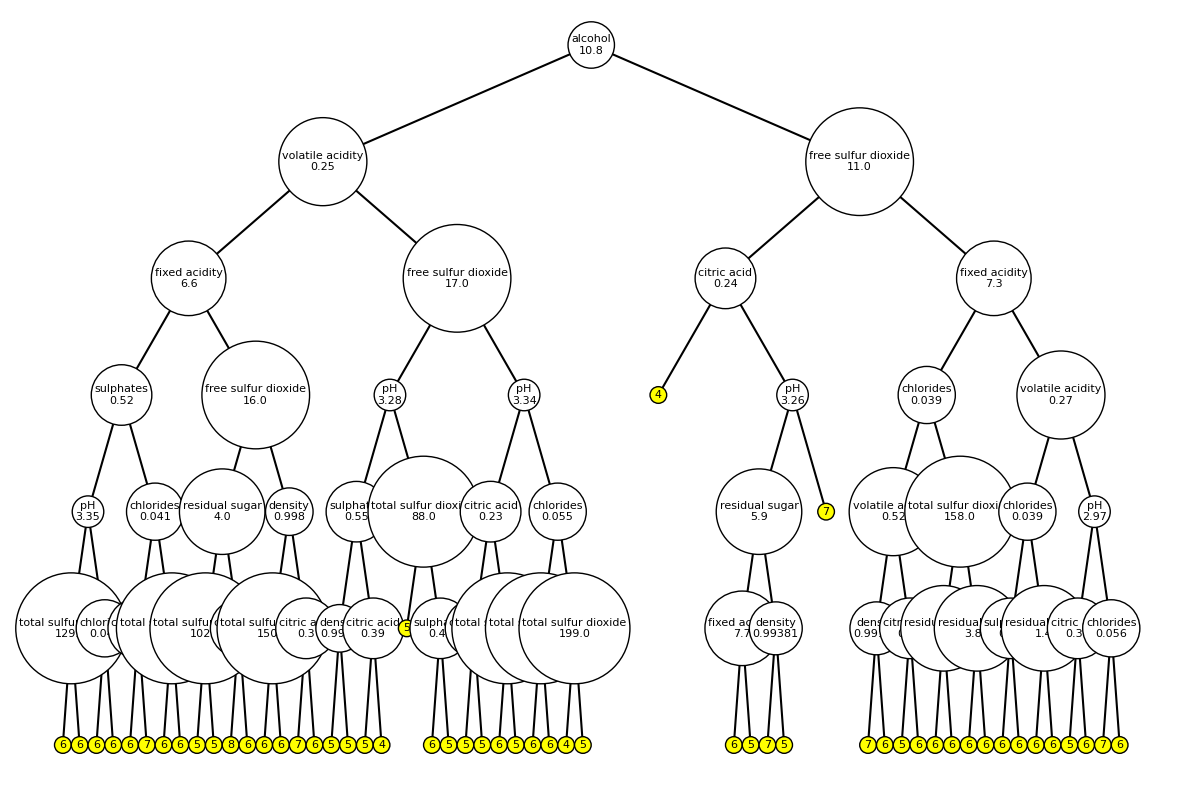

In [331]:
model_C45=DecisionTree_C45(max_depth=5,min_samples_split=10,min_impurity=1e-3)
model_C45.fit(X,y)
model_C45.plot_tree()

In [7]:
from typing import Any
import sklearn.cross_decomposition as cross_decomposition
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import requests
import os
import copy

# 定义树节点值
class tree_node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,value=None):
        self.feature=feature
        self.threshold=threshold
        self.left=left
        self.right=right
        self.value=value
    
    #判断是否为叶子节点
    def is_leaf(self):
        return self.value is not None

    # Obeject类重载
    def __repr__(self):
        if self.is_leaf():
            return 'Leaf:{:.3f}'.format(self.value)
        else:
            return 'Node:{:.3f}'.format(self.threshold)
    
    # Obeject类重载__getitem__方法
    def __getitem__(self,key):
        return self.__dict__[key]

# 定义C4.5决策树
class DecisionTree:
    # 初始化
    '''ArithmeticError
    :param max_depth: 最大深度(默认为2)
    :param min_samples_split: 最小切分样本数(默认为2)
    :param min_impurity: 最小信息增益(默认为1e-7)
    :mothod: C4.5 or CART
    :pruning: 是否剪枝
    '''
    def __init__(self,max_depth=2,min_samples_split=2,min_impurity=1e-7,mothod='C4.5',pruning=False):
        self._root=None
        self._max_depth=max_depth
        self._min_samples_split=min_samples_split
        self._min_impurity=min_impurity
    
        # 检测mothod是否合法
        if mothod not in ['C4.5','CART']:
            raise ValueError('mothod must be C4.5 or CART')
        self.mothod=mothod
    
    # 计算基尼系数
    def _gini(self,y):
        # 统计y中每个类别的个数
        classes=np.unique(y)
        # 计算基尼系数
        gini=0
        for i in classes:
            gini+=np.sum(y==i)/len(y)*(1-np.sum(y==i)/len(y))
        return gini
    
    # 计算信息熵
    def _entropy(self,y):
        # 统计y中每个类别的个数
        classes=np.unique(y)
        # 计算信息熵
        entropy=0
        for i in classes:
            entropy+=np.sum(y==i)/len(y)*np.log2(np.sum(y==i)/len(y))
        return -entropy
    
    # 计算信息增益
    def _info_gain(self,y,y1,y2):
        if self.mothod=='C4.5':
            # 计算y的信息熵
            entropy=self._entropy(y)
            # 计算y1的信息熵
            entropy1=self._entropy(y1)
            # 计算y2的信息熵
            entropy2=self._entropy(y2)
            # 计算信息增益
            info_gain=entropy-(len(y1)/len(y)*entropy1+len(y2)/len(y)*entropy2)
            return info_gain
        elif self.mothod=='CART':
            # 计算y的基尼系数
            gini=self._gini(y)
            # 计算y1的基尼系数
            gini1=self._gini(y1)
            # 计算y2的基尼系数
            gini2=self._gini(y2)
            # 计算信息增益
            info_gain=gini-(len(y1)/len(y)*gini1+len(y2)/len(y)*gini2)
            return info_gain
    
    # 计算最优切分点
    def _get_split_point(self,X : pd.DataFrame,y : pd.Series):
        # 初始化最优切分点
        best_info_gain=-1
        best_feature=None
        best_threshold=None
        # 遍历每个特征
        for feature in X.columns:
            # 获取该特征的所有取值
            feature_values=X[feature].unique()
            # 遍历该特征的每个取值
            for threshold in feature_values:
                # 根据该特征的该取值切分数据集
                y1=y[X[feature]<=threshold]
                y2=y[X[feature]>threshold]
                # 如果切分后的数据集小于最小切分样本数，则跳过该次循环
                if len(y1)<self._min_samples_split or len(y2)<self._min_samples_split:
                    continue
                # 计算信息增益
                info_gain=self._info_gain(y,y1,y2)
                # 如果信息增益大于最优信息增益，则更新最优信息增益、最优特征、最优切分点
                if info_gain>best_info_gain:
                    best_info_gain=info_gain
                    best_feature=feature
                    best_threshold=threshold
        return best_feature,best_threshold
    
    # 递归构建决策树
    def _build_tree(self,X:pd.DataFrame,y:pd.DataFrame,depth=0):
        # 如果当前节点的深度大于最大深度，则将当前节点的y值的众数设为叶子节点的值
        if depth>self._max_depth:
            return tree_node(value=y.value_counts().index[0])

        # 如果当前节点的样本数小于最小切分样本数，则将当前节点的y值的众数设为叶子节点的值
        if len(y)<self._min_samples_split or len(np.unique(y))==1 :
            return tree_node(value=y.value_counts().index[0])
        
        # 如果当前X只有一个特征，则将当前节点的y值的众数设为叶子节点的值
        if X.columns.size==1:
            return tree_node(value=y.value_counts().index[0])
        
        # 计算最优切分点
        feature,threshold=self._get_split_point(X,y)
        # 如果最优切分点的信息增益小于最小信息增益，则将当前节点的y值的众数设为叶子节点的值
        if feature is None or threshold < self._min_impurity:
            return tree_node(value=y.value_counts().index[0])
        
        new_col = X.columns.drop(feature)
        X_left  = X[new_col][X[feature]<=threshold]
        X_right = X[new_col][X[feature]>threshold]

        print("第{:d}层feature:".format(depth),feature)
        print("第{:d}层threshold:".format(depth),threshold)

        # 递归构建左子树
        left=self._build_tree(X_left,y[X[feature]<=threshold],depth+1)
        # 递归构建右子树
        right=self._build_tree(X_right,y[X[feature]>threshold],depth+1)
        # 返回当前节点
        return tree_node(feature,threshold,left,right)
    
    # 训练
    def fit(self,X:pd.DataFrame,y:pd.DataFrame):
        self._root=self._build_tree(X,y)

    # 预测
    def predict(self,X):
        # 预测结果列表
        y_pred=[]
        # 遍历每个样本
        for i in range(len(X)):
            # 从根节点开始
            sample=X.iloc[i,:]
            node=self._root
            # 如果当前节点不是叶子节点，则遍历子树
            while not node.is_leaf():
                # 如果样本的特征值小于当前节点的切分点，则遍历左子树
                if sample[node['feature']]<=node['threshold']:
                    node=node['left']
                # 如果样本的特征值大于当前节点的切分点，则遍历右子树
                else:
                    node=node['right']
            # 将当前节点的值作为预测结果
            y_pred.append(node['value'])
        return np.array(y_pred)
    
    # 计算准确率
    def accuracy(self,y,y_pred):
        return np.sum(y==y_pred)/len(y)
    
    # 可视化决策树
    def plot_tree(self):
        # 定义画布
        plt.figure(figsize=(15,8))
        # 定义子图
        ax=plt.subplot(111)
        # 隐藏坐标轴
        plt.axis('off')
        # 递归绘制决策树
        self._plot_tree(ax,self._root)
        # 显示图像
        plt.show()

    # 递归绘制决策树
    def _plot_tree(self,ax,node,x=0,y=0,level=3.5):
        # 如果当前节点是叶子节点，则绘制叶子节点
        if node.is_leaf():
            ax.text(x,y,node['value'],ha='center',va='center',fontsize=8,bbox=dict(facecolor='yellow',edgecolor='black',boxstyle='circle'))
        # 如果当前节点不是叶子节点，则绘制切分点
        else:
            ax.text(x,y,node['feature']+'\n'+str(node['threshold']),ha='center',va='center',fontsize=8,bbox=dict(facecolor='white',edgecolor='black',boxstyle='circle'))
            
            # 绘制连线
            ax.plot([x,x-level],[y,y-1],c='black')
            ax.plot([x,x+level],[y,y-1],c='black')

            # 绘制左子树
            self._plot_tree(ax,node['left'],x-level,y-1,level/2)
            # 绘制右子树
            self._plot_tree(ax,node['right'],x+level,y-1,level/2)

    

In [11]:
# 定义树节点值
class tree_node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,value=None,parent=None):
        self.feature=feature
        self.threshold=threshold
        self.left=left
        self.right=right
        self.value=value
        self.parent=parent
    
    #判断是否为叶子节点
    def is_leaf(self):
        return self.value is not None
    
    def __setattribute__(self,name,value):
        self.__dict__[name]=value
    
    def __setitem__(self,key,value):
        self.__dict__[key]=value

    # Obeject类重载
    def __repr__(self):
        if self.is_leaf():
            return 'Leaf:{:.3f}'.format(self.value)
        else:
            return 'Node:{:.3f}'.format(self.threshold)
    
    # Obeject类重载__getitem__方法
    def __getitem__(self,key):
        return self.__dict__[key]

    def __getattr__(self, __name: str) :
        return self.__dict__[__name]
    
    # get_parent
    def get_parent(self):
        return self.parent

# 定义决策树
class DecisionTree:
    # 初始化
    '''ArithmeticError
    :param max_depth: 最大深度(默认为2)
    :param min_samples_split: 最小切分样本数(默认为2)
    :param min_impurity: 最小信息增益(默认为1e-7)
    :mothod: C4.5 or CART
    :pruning: 是否剪枝
    '''
    def __init__(self,max_depth=2,min_samples_split=2,min_impurity=1e-7,
                    mothod='C4.5',is_pruning=False):
        self._root=None
        self._max_depth=max_depth
        self._min_samples_split=min_samples_split
        self._min_impurity=min_impurity
        self._is_pruning=is_pruning
    
        # 检测mothod是否合法
        if mothod not in ['C4.5','CART']:
            raise ValueError('mothod must be C4.5 or CART')
        self.mothod=mothod
    
    # 计算基尼系数
    def _gini(self,y):
        # 统计y中每个类别的个数
        classes=np.unique(y)
        # 计算基尼系数
        gini=0
        for i in classes:
            gini+=np.sum(y==i)/len(y)*(1-np.sum(y==i)/len(y))
        return gini
    
    # 计算信息熵
    def _entropy(self,y):
        # 统计y中每个类别的个数
        classes=np.unique(y)
        # 计算信息熵
        entropy=0
        for i in classes:
            entropy+=np.sum(y==i)/len(y)*np.log2(np.sum(y==i)/len(y))
        return -entropy
    
    # 计算信息增益
    def _info_gain(self,y,y1,y2):
        if self.mothod=='C4.5':
            # 计算y的信息熵
            entropy=self._entropy(y)
            # 计算y1的信息熵
            entropy1=self._entropy(y1)
            # 计算y2的信息熵
            entropy2=self._entropy(y2)
            # 计算信息增益
            info_gain=entropy-(len(y1)/len(y)*entropy1+len(y2)/len(y)*entropy2)
            return info_gain
        elif self.mothod=='CART':
            # 计算y的基尼系数
            gini=self._gini(y)
            # 计算y1的基尼系数
            gini1=self._gini(y1)
            # 计算y2的基尼系数
            gini2=self._gini(y2)
            # 计算信息增益
            info_gain=gini-(len(y1)/len(y)*gini1+len(y2)/len(y)*gini2)
            return info_gain
    
    # 计算最优切分点
    def _get_split_point(self,X : pd.DataFrame,y : pd.Series):
        # 初始化最优切分点
        best_info_gain=-1
        best_feature=None
        best_threshold=None
        # 遍历每个特征
        for feature in X.columns:
            # 获取该特征的所有取值
            feature_values=X[feature].unique()
            # 遍历该特征的每个取值
            for threshold in feature_values:
                # 根据该特征的该取值切分数据集
                y1=y[X[feature]<=threshold]
                y2=y[X[feature]>threshold]
                # 如果切分后的数据集小于最小切分样本数，则跳过该次循环
                if len(y1)<self._min_samples_split or len(y2)<self._min_samples_split:
                    continue
                # 计算信息增益
                info_gain=self._info_gain(y,y1,y2)
                # 如果信息增益大于最优信息增益，则更新最优信息增益、最优特征、最优切分点
                if info_gain>best_info_gain:
                    best_info_gain=info_gain
                    best_feature=feature
                    best_threshold=threshold
        return best_feature,best_threshold
    
    # 递归构建决策树
    def _build_tree(self,X:pd.DataFrame,y:pd.DataFrame,parent_node=None,depth=0):
        # 如果当前节点的深度大于最大深度，则将当前节点的y值的众数设为叶子节点的值
        if depth>self._max_depth:
            return tree_node(value=y.value_counts().index[0],parent=parent_node)

        # 如果当前节点的样本数小于最小切分样本数，则将当前节点的y值的众数设为叶子节点的值
        if len(y)<self._min_samples_split or len(np.unique(y))==1 :
            return tree_node(value=y.value_counts().index[0],parent=parent_node)
        
        # 如果当前X只有一个特征，则将当前节点的y值的众数设为叶子节点的值
        if X.columns.size==1:
            return tree_node(value=y.value_counts().index[0],parent=parent_node)
        
        # 计算最优切分点
        feature,threshold=self._get_split_point(X,y)
        # 如果最优切分点的信息增益小于最小信息增益，则将当前节点的y值的众数设为叶子节点的值
        if feature is None or threshold < self._min_impurity:
            return tree_node(value=y.value_counts().index[0],parent=parent_node)
        
        new_col = X.columns.drop(feature)
        X_left  = X[new_col][X[feature]<=threshold]
        X_right = X[new_col][X[feature]>threshold]

        # print("第{:d}层feature:".format(depth),feature)
        # print("第{:d}层threshold:".format(depth),threshold)

        Cur_node=tree_node(feature,threshold,parent=parent_node)
        # 递归构建左子树
        left=self._build_tree(X_left,y[X[feature]<=threshold],Cur_node,depth+1)
        # 递归构建右子树
        right=self._build_tree(X_right,y[X[feature]>threshold],Cur_node,depth+1)
        # 将左子树和右子树设为当前节点的子节点
        Cur_node.left=left
        Cur_node.right=right
        # 返回当前节点
        return Cur_node
    
    # 训练
    def fit(self,X : pd.DataFrame,y : pd.DataFrame,X_test : pd.DataFrame =None ,y_test : pd.DataFrame =None):
        self._root=self._build_tree(X,y)
        self._node_merge(self._root)
        if X_test is not None and y_test is not None and self._is_pruning == True:
            self.pruning(X_test,y_test)


    # 预测,并且返回每个样本的叶子节点
    def predict(self,X,node=None):
        # 预测结果列表
        y_leaf_node=[]
        y_pred=[]
        # 遍历每个样本
        for i in range(len(X)):
            # 从根节点开始
            sample=X.iloc[i,:]
            if node is None:
                node=self._root
            # 如果当前节点不是叶子节点，则遍历子树
            while not node.is_leaf():
                # 如果样本的特征值小于当前节点的切分点，则遍历左子树
                if sample[node['feature']]<=node['threshold']:
                    node=node['left']
                # 如果样本的特征值大于当前节点的切分点，则遍历右子树
                else:
                    node=node['right']
            # 将当前节点的值作为预测结果
            y_pred.append(node['value'])
            y_leaf_node.append(node)
        return np.array(y_pred),y_leaf_node
    
    # 计算准确率
    def accuracy(self,y,y_pred):
        return np.sum(y==y_pred)/len(y)
    
    # 可视化决策树
    def plot_tree(self):
        # 定义画布
        plt.figure(figsize=(15,8))
        # 定义子图
        ax=plt.subplot(111)
        # 隐藏坐标轴
        plt.axis('off')
        # 递归绘制决策树
        self._plot_tree(ax,self._root)
        # 显示图像
        plt.show()

    # 递归绘制决策树
    def _plot_tree(self,ax,node,x=0,y=0,level=3.5):
        # 如果当前节点是叶子节点，则绘制叶子节点
        if node.is_leaf():
            ax.text(x,y,node['value'],ha='center',va='center',fontsize=8,bbox=dict(facecolor='yellow',edgecolor='black',boxstyle='circle'))
        # 如果当前节点不是叶子节点，则绘制切分点
        else:
            ax.text(x,y,node['feature']+'\n'+str(node['threshold']),ha='center',va='center',fontsize=8,bbox=dict(facecolor='white',edgecolor='black',boxstyle='circle'))
            
            # 绘制连线
            ax.plot([x,x-level],[y,y-1],c='black')
            ax.plot([x,x+level],[y,y-1],c='black')

            # 绘制左子树
            self._plot_tree(ax,node['left'],x-level,y-1,level/2)
            # 绘制右子树
            self._plot_tree(ax,node['right'],x+level,y-1,level/2)

    # 获取node节点的所有叶子节点
    def _get_leaves(self,node):
        # 如果当前节点是叶子节点，则将当前节点加入叶子节点列表
        if node.is_leaf():
            return [node]
        # 如果当前节点不是叶子节点，则遍历子树
        else:
            return self._get_leaves(node['left'])+self._get_leaves(node['right'])

    # 根据验证集数据对已经构建好的决策树子树进行剪枝
    def _data_merching(self,X_val,y_val):        
        # 存储每个叶子节点对应的数据y与y_pred
        y_leaf_value={}

        # 遍历每个样本
        for i in range(len(X_val)):
            # 从根节点开始
            sample=X_val.iloc[i,:]
            node=self._root
            # 如果当前节点不是叶子节点，则遍历子树
            while not node.is_leaf():
                # 如果样本的特征值小于当前节点的切分点，则遍历左子树
                if sample[node['feature']]<=node['threshold']:
                    node=node['left']
                # 如果样本的特征值大于当前节点的切分点，则遍历右子树
                else:
                    node=node['right']
            
            if type(y_leaf_value.get(node,0))==int:
                y_leaf_value[node]=[[i,y_val.iloc[i],node['value']]]
            else :
                y_leaf_value[node].append([i,y_val.iloc[i],node['value']])
        return y_leaf_value
    
    def _dfs_pruning(self,node,y_leaf_value):
        """
        warning: 此处不可使用elif，因为如果使用elif，当node['left']为叶子节点时，node['right']不会被遍历
        """
        if not node['left'].is_leaf():
            self._dfs_pruning(node['left'],y_leaf_value)

        if not node['right'].is_leaf():
            self._dfs_pruning(node['right'],y_leaf_value)
        
        if node['left'].is_leaf() and node['right'].is_leaf() :
            left=node['left']
            right=node['right']
            if left not in y_leaf_value.keys() or right not in y_leaf_value.keys():
                return
            y_index_val_pre=np.array(y_leaf_value[left]+y_leaf_value[right])
            y_index=y_index_val_pre[:,0]

            # 剪枝前准确度
            acc_not_prun=self.accuracy(y_index_val_pre[:,1],y_index_val_pre[:,2])
            # 剪枝后准确度
            acc_pruned=self.accuracy(y_index_val_pre[:,1],np.argmax(np.bincount(y_index_val_pre[:,1])))

            #删除子树
            if acc_pruned<acc_not_prun:
                node.value=np.argmax(np.bincount(y_index_val_pre[:,1]))
                node.left=None
                node.right=None
                node.feature=None
                node.threshold=None
                del y_leaf_value[left]
                del y_leaf_value[right]
                y_leaf_value[node]=y_index_val_pre.tolist()
            
    # 如果发现同样的子节点对应的两个叶子节点的值相同，则将这两个叶子节点合并
    def _node_merge(self,node):
        if not node['left'].is_leaf():
            self._node_merge(node['left'])
        if not node['right'].is_leaf():
            self._node_merge(node['right'])
        if node['left'].is_leaf() and node['right'].is_leaf():
            if node['left']['value']==node['right']['value']:
                node['value']=node['left']['value']
                node['left']=None
                node['right']=None
                node['feature']=None
                node['threshold']=None

    # 剪枝
    def pruning(self,X_test,y_test):
        y_leaf_value=self._data_merching(X_test,y_test)
        print('数据匹配完毕')
        self._dfs_pruning(self._root,y_leaf_value)
        self._node_merge(self._root)


In [9]:
#随机取部分X,y的数据作为验证集

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

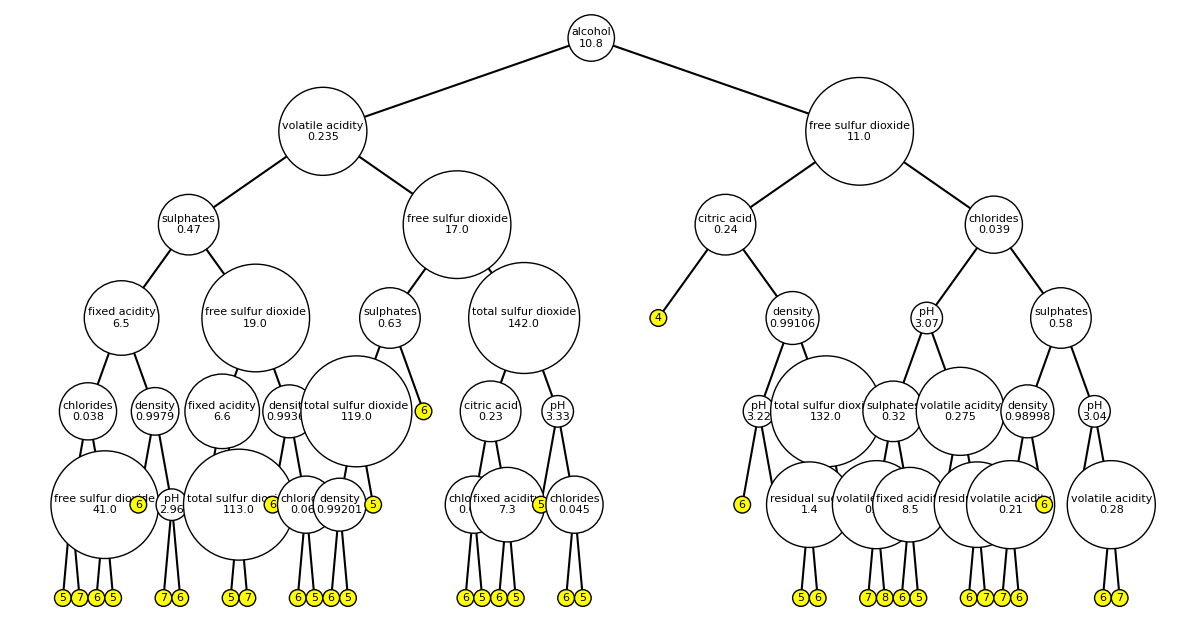

In [13]:
model_CART=DecisionTree(max_depth=5,min_samples_split=10,min_impurity=1e-3,mothod='CART',is_pruning=False)
model_CART.fit(X,y,X_test,y_test)
model_CART.plot_tree()

In [149]:
y_leaf_value=model_CART._data_merching(X_test,y_test)
y_leaf_value

{Leaf:7.000: [[0, 7, 7],
  [4, 7, 7],
  [83, 7, 7],
  [154, 7, 7],
  [164, 7, 7],
  [185, 7, 7],
  [209, 6, 7]],
 Leaf:7.000: [[1, 8, 7],
  [5, 6, 7],
  [16, 8, 7],
  [27, 6, 7],
  [35, 7, 7],
  [55, 7, 7],
  [78, 7, 7],
  [84, 7, 7],
  [109, 6, 7],
  [115, 7, 7],
  [126, 7, 7],
  [140, 8, 7],
  [142, 6, 7],
  [174, 6, 7],
  [186, 7, 7],
  [196, 7, 7],
  [197, 6, 7],
  [206, 7, 7],
  [213, 7, 7],
  [235, 7, 7],
  [241, 4, 7],
  [242, 7, 7]],
 Leaf:6.000: [[2, 8, 6],
  [10, 7, 6],
  [36, 7, 6],
  [61, 6, 6],
  [63, 7, 6],
  [85, 6, 6],
  [94, 8, 6],
  [95, 7, 6],
  [99, 6, 6],
  [101, 5, 6],
  [110, 6, 6],
  [112, 6, 6],
  [121, 6, 6],
  [138, 6, 6],
  [156, 6, 6],
  [171, 6, 6],
  [172, 6, 6],
  [177, 6, 6],
  [180, 6, 6],
  [192, 7, 6],
  [218, 6, 6],
  [219, 6, 6],
  [224, 6, 6],
  [227, 7, 6],
  [244, 7, 6]],
 Leaf:5.000: [[3, 5, 5],
  [6, 5, 5],
  [9, 5, 5],
  [15, 5, 5],
  [22, 5, 5],
  [25, 5, 5],
  [26, 5, 5],
  [29, 5, 5],
  [30, 5, 5],
  [31, 5, 5],
  [32, 6, 5],
  [33, 6, 5],

In [150]:
left=list(y_leaf_value.keys())[0]
right=list(y_leaf_value.keys())[1]
y_leaf_value[right]

[[1, 8, 7],
 [5, 6, 7],
 [16, 8, 7],
 [27, 6, 7],
 [35, 7, 7],
 [55, 7, 7],
 [78, 7, 7],
 [84, 7, 7],
 [109, 6, 7],
 [115, 7, 7],
 [126, 7, 7],
 [140, 8, 7],
 [142, 6, 7],
 [174, 6, 7],
 [186, 7, 7],
 [196, 7, 7],
 [197, 6, 7],
 [206, 7, 7],
 [213, 7, 7],
 [235, 7, 7],
 [241, 4, 7],
 [242, 7, 7]]

In [161]:
len([[]])

1

In [165]:
b=np.array(y_leaf_value[left]+y_leaf_value[right])[:,1]

In [166]:
a=np.array(y_leaf_value[left]+y_leaf_value[right])[:,2]

In [167]:
model_CART.accuracy(a,b)

0.6206896551724138

In [152]:
t=y_leaf_value[left]+y_leaf_value[right]
t

[[0, 7, 7],
 [4, 7, 7],
 [83, 7, 7],
 [154, 7, 7],
 [164, 7, 7],
 [185, 7, 7],
 [209, 6, 7],
 [1, 8, 7],
 [5, 6, 7],
 [16, 8, 7],
 [27, 6, 7],
 [35, 7, 7],
 [55, 7, 7],
 [78, 7, 7],
 [84, 7, 7],
 [109, 6, 7],
 [115, 7, 7],
 [126, 7, 7],
 [140, 8, 7],
 [142, 6, 7],
 [174, 6, 7],
 [186, 7, 7],
 [196, 7, 7],
 [197, 6, 7],
 [206, 7, 7],
 [213, 7, 7],
 [235, 7, 7],
 [241, 4, 7],
 [242, 7, 7]]

In [113]:
y_leaf_value={}

# 遍历每个样本
for i in range(len(X_test)):
    # 从根节点开始
    sample=X_test.iloc[i,:]
    node=model_CART._root
    # 如果当前节点不是叶子节点，则遍历子树
    while not node.is_leaf():
        # 如果样本的特征值小于当前节点的切分点，则遍历左子树
        if sample[node['feature']]<=node['threshold']:
            node=node['left']
        # 如果样本的特征值大于当前节点的切分点，则遍历右子树
        else:
            node=node['right']
    
    if type(y_leaf_value.get(node,0))==int:
        y_leaf_value[node]=[[i,y_test.iloc[i],node['value']]]
    else :
        y_leaf_value[node].append([i,y_test.iloc[i],node['value']])


In [99]:
node=model_CART._root
# 如果当前节点不是叶子节点，则遍历子树
while not node.is_leaf():
    # 如果样本的特征值小于当前节点的切分点，则遍历左子树
    if sample[node['feature']]<=node['threshold']:
        node=node['left']
    # 如果样本的特征值大于当前节点的切分点，则遍历右子树
    else:
        node=node['right']
    

In [114]:
y_leaf_value

{Leaf:7.000: [[0, 7, 7],
  [4, 7, 7],
  [83, 7, 7],
  [154, 7, 7],
  [164, 7, 7],
  [185, 7, 7],
  [209, 6, 7],
  [385, 6, 7],
  [420, 7, 7],
  [423, 7, 7]],
 Leaf:7.000: [[1, 8, 7],
  [5, 6, 7],
  [16, 8, 7],
  [27, 6, 7],
  [35, 7, 7],
  [55, 7, 7],
  [78, 7, 7],
  [84, 7, 7],
  [109, 6, 7],
  [115, 7, 7],
  [126, 7, 7],
  [140, 8, 7],
  [142, 6, 7],
  [174, 6, 7],
  [186, 7, 7],
  [196, 7, 7],
  [197, 6, 7],
  [206, 7, 7],
  [213, 7, 7],
  [235, 7, 7],
  [241, 4, 7],
  [242, 7, 7],
  [264, 7, 7],
  [282, 6, 7],
  [285, 7, 7],
  [314, 7, 7],
  [315, 7, 7],
  [317, 6, 7],
  [319, 6, 7],
  [322, 6, 7],
  [357, 8, 7],
  [381, 6, 7],
  [386, 7, 7],
  [408, 7, 7],
  [409, 7, 7],
  [412, 8, 7],
  [424, 7, 7],
  [430, 7, 7],
  [433, 6, 7],
  [434, 7, 7],
  [446, 6, 7],
  [454, 6, 7],
  [480, 7, 7]],
 Leaf:6.000: [[2, 8, 6],
  [10, 7, 6],
  [36, 7, 6],
  [61, 6, 6],
  [63, 7, 6],
  [85, 6, 6],
  [94, 8, 6],
  [95, 7, 6],
  [99, 6, 6],
  [101, 5, 6],
  [110, 6, 6],
  [112, 6, 6],
  [121, 6, 6

In [ ]:
model_CART._data_merching(X_test,y_test)

In [17]:
model_CART.accuracy(y,model_CART.predict(X))

0.5728868926092282

In [22]:
X.iloc[[2,3,4],:]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
2     10.1  
3      9.9  
4      9.9

In [13]:
model_CART._root['left']['parent']

Node:10.800

In [40]:
t=np.array([[1,2,3],[4,2,6],[4,3,6]])
t.tolist()

[[1, 2, 3], [4, 2, 6], [4, 3, 6]]

In [38]:
# 取t[:,1]的众数
np.argmax(np.bincount(t[:,1]))


2

In [35]:
X.iloc[t[:,1],:]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2            8.1              0.28          0.4             6.9       0.05   
5            8.1              0.28          0.4             6.9       0.05   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2                 30.0                  97.0   0.9951  3.26       0.44   
5                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  
2     10.1  
5     10.1

In [ ]:
#从字典中删除指定键值对
def del_key(dict,key):
    dict_copy=dict.copy()
    del dict_copy[key]
    return dict_copy

In [58]:
from typing import Any


class A:
    def __init__(self):
        self.a=1
        self.b=2
    
    def __setattribute__(self,name,value):
        self.__dict__[name]=value
    
    def __setitem__(self,key,value):
        self.__dict__[key]=value
    
    def __getattr__(self, __name: str) -> Any:
        return self.__dict__[__name]
    
    def __getitem__(self,key):
        return self.__dict__[key]

In [60]:
k=A()
k['a']=3
k['a']

3